<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_12_%EB%B6%84%ED%95%B4(Decomposition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## PCA(principal component analysis)
* 실제 데이터들의 대부분은 매우 많은 설명 변수(= 특성 = feature = 흔히 X 값)들을 가지고 있습니다. 따라서 머신러닝 알고리즘을 적용해서 문제를 해결하는 데 있어서 어려움이 많습니다.
* 전체 데이터의 양이 너무 많아서 학습 속도가 느려진다.
* 별로 의미없는 feature들로 인해서 과적합되거나 학습이 잘 되지 않는다.
* 그러므로 feature selection이나 Dimensionality Reduction(차원 축소) 등의 작업이 필요합니다.

## 데이터 불러오기 및 시각화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.decomposition import MiniBatchDictionaryLearning, TruncatedSVD, DictionaryLearning, FactorAnalysis

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


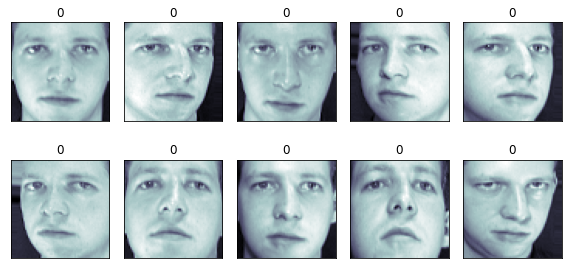

In [ ]:
face = fetch_olivetti_faces()
x_data = face.data
y_data = face.target

N = 2
M = 5

fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

idx = np.where(face.target == 0)
klist = list(idx[0])

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(face.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(face.target[k])
plt.tight_layout()
plt.show()

In [ ]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [ ]:
def plot_iris(iris, labels):
  plt.figure()
  colors =['navy','purple','red']
  for xy, label in zip(iris, labels):
    plt.scatter(xy[0], xy[1], color=colors[label])

In [ ]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2, 3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(np.reshape(faces[i],(64,64)), cmap=plt.cm.gray)

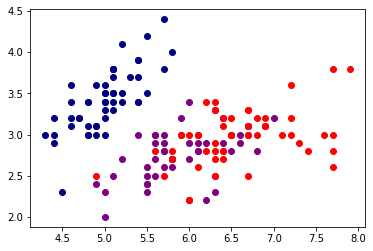

In [ ]:
plot_iris(iris[:, :2], labels)

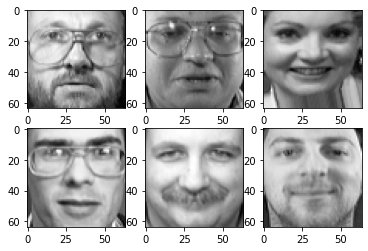

In [ ]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

In [ ]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

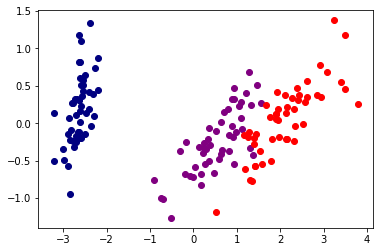

In [ ]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [ ]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

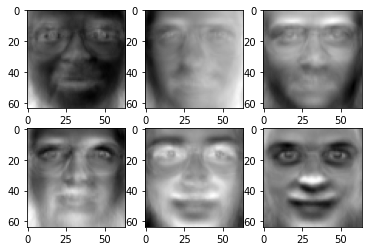

In [ ]:
show_faces(faces_components)

## Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [ ]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

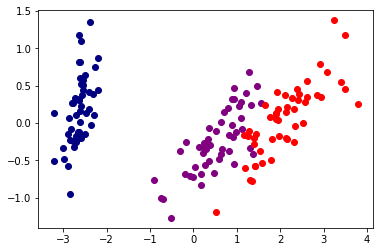

In [ ]:
plot_iris(transformed_iris, labels)

In [ ]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

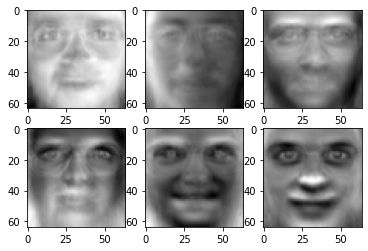

In [ ]:
show_faces(faces_components)

## Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

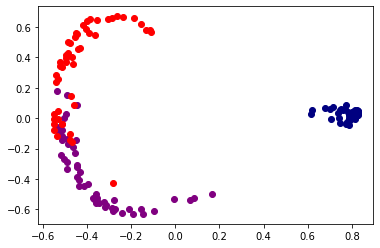

In [ ]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

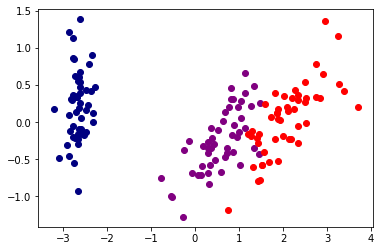

In [ ]:
model = SparsePCA(n_components=2,random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

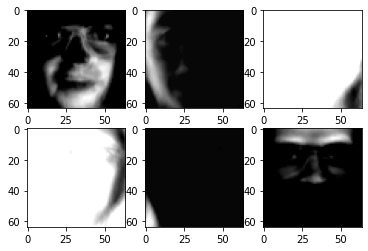

In [ ]:
model = SparsePCA(n_components=2*3,random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

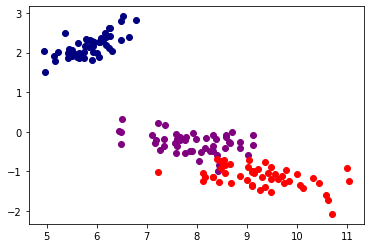

In [ ]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

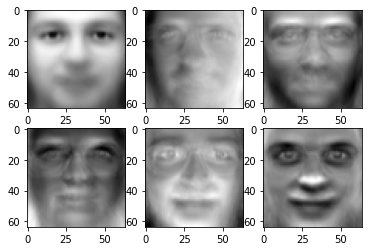

In [ ]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

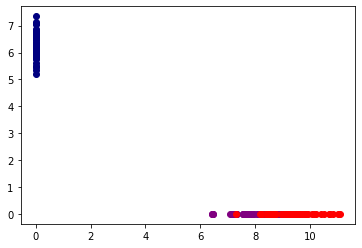

In [ ]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

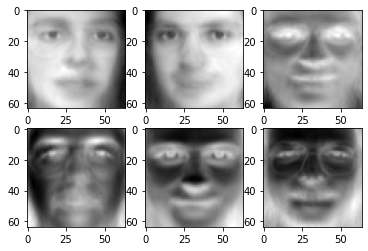

In [ ]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

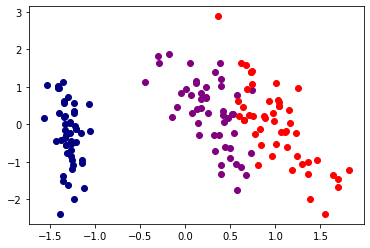

In [ ]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

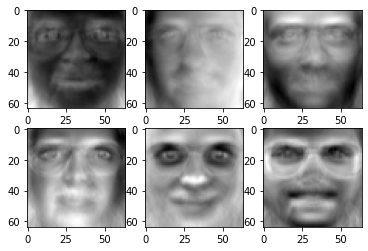

In [ ]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

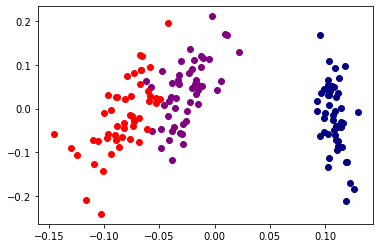

In [ ]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

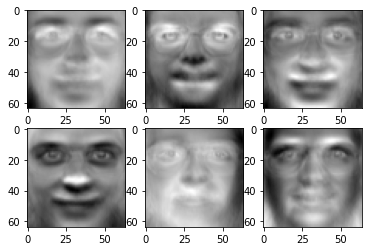

In [ ]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


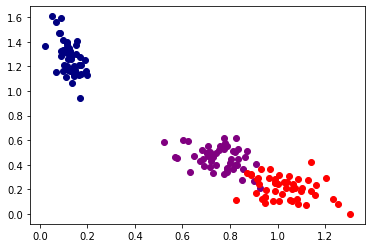

In [ ]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


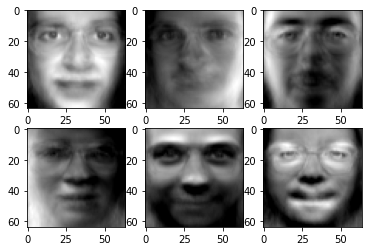

In [ ]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


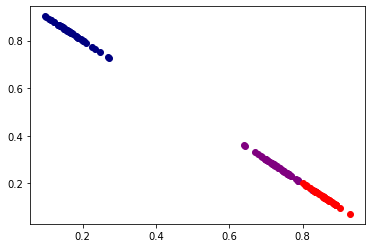

In [ ]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

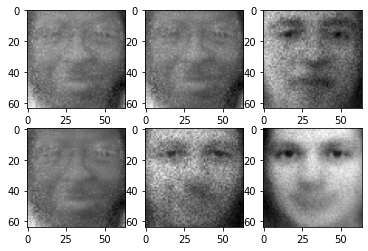

In [ ]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스르 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

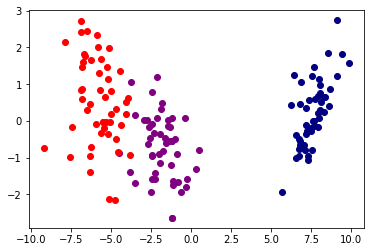

In [ ]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score

In [ ]:
def min_max_scaler(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [ ]:
def plot_digits(digits, labels):
  digits = min_max_scaler(digits)
  ax = plt.subplot(111, projection = '3d')

  for i in range(digits.shape[0]):
    ax.text(digits[i, 0], digits[i, 1],digits[i, 2], str(labels[i]), color=plt.cm.Set1(labels[i]/10.), fontdict={'weight':'bold','size':9})
    ax.view_init(4, -72)

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
print(decomposed_digits.shape)

(1797, 3)


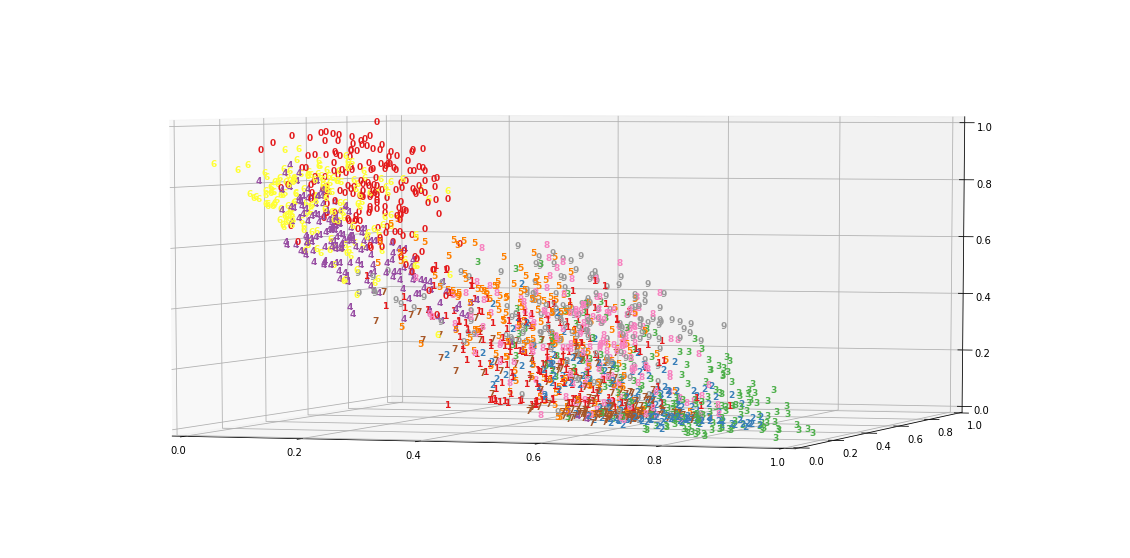

In [ ]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
score = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=5)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.9627282575054161 (+/-0.011168537355954218)


In [ ]:
score = cross_val_score(estimator=knn, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5854441349427422 (+/-0.03214521445075084)


### SVM

In [ ]:
svm  = SVC()

In [ ]:
score = cross_val_score(estimator=svm, X=digits.data, y=digits.target, cv=5)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.9632838130609718 (+/-0.02008605863225686)


In [ ]:
score = cross_val_score(estimator=svm, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.6193670690188796 (+/-0.022070024720937543)


### Decision Tree

In [ ]:
decistion_tree = DecisionTreeClassifier()

In [ ]:
score = cross_val_score(estimator=decistion_tree, X=digits.data, y=digits.target, cv=5)
score

array([0.78888889, 0.72222222, 0.8189415 , 0.81615599, 0.78830084])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.7869018879603839 (+/-0.034847392482236846)


In [ ]:
score = cross_val_score(estimator=decistion_tree, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.575     , 0.50277778, 0.5821727 , 0.5821727 , 0.51253482])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5509316001238007 (+/-0.035565163210385026)


### Random Forest

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
score = cross_val_score(estimator=random_forest, X=digits.data, y=digits.target, cv=5)
score

array([0.93611111, 0.91388889, 0.95543175, 0.96935933, 0.92200557])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.9393593314763231 (+/-0.020585286865341675)


In [ ]:
score = cross_val_score(estimator=random_forest, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.575     , 0.60555556, 0.65181058, 0.59888579, 0.55988858])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5982281027545651 (+/-0.031415506778900204)


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [ ]:
components = nmf.components_
reconstruted_digits = decomposed_digits @ components
reconstruted_digits.shape

(1797, 64)

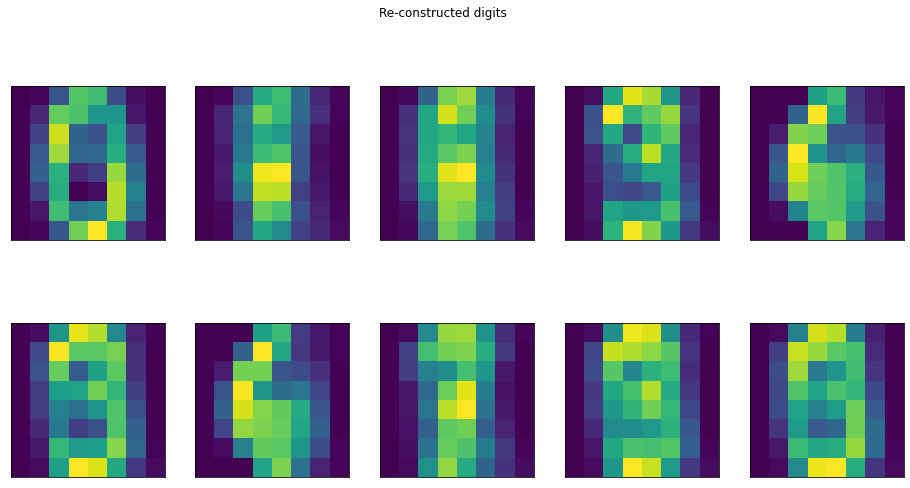

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Re-constructed digits')
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(reconstruted_digits[i].reshape(8,8))

### KNN

In [ ]:
score = cross_val_score(estimator=knn, X=reconstruted_digits, y=digits.target, cv=5)
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5898963169297431 (+/-0.04029722337499952)


### SVM

In [ ]:
score = cross_val_score(estimator=svm, X=reconstruted_digits, y=digits.target, cv=5)
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.6171402042711235 (+/-0.025969174809053776)


### Decision Tree

In [ ]:
score = cross_val_score(estimator=decistion_tree, X=reconstruted_digits, y=digits.target, cv=5)
score

array([0.57222222, 0.52222222, 0.55431755, 0.545961  , 0.54317549])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5475796966883317 (+/-0.016233739280758105)


### Random Forest

In [ ]:
score = cross_val_score(estimator=random_forest, X=reconstruted_digits, y=digits.target, cv=5)
score

array([0.58888889, 0.57222222, 0.65181058, 0.60445682, 0.57381616])

In [ ]:
print('mean cross val scroe:{} (+/-{})'.format(score.mean(), score.std()))

mean cross val scroe:0.5982389353141443 (+/-0.029221049501700746)


## 이미지 복원

In [ ]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

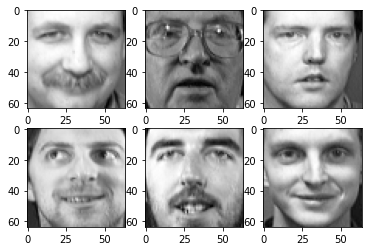

In [ ]:
show_faces(train_faces)

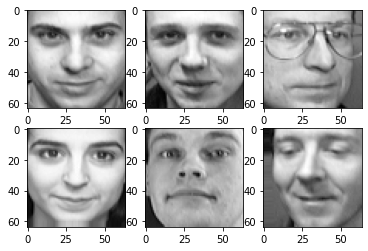

In [ ]:
show_faces(test_faces)

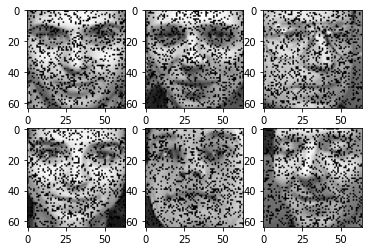

In [ ]:
import numpy as np

damaged_faces=[]

for face in test_faces:
  idx = np.random.choice(range(64*64), size =1024)
  damaged_face = face.copy()
  damaged_face[idx] = .0
  damaged_faces.append(damaged_face)

show_faces(damaged_faces)

In [ ]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=10)

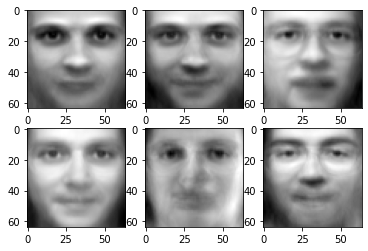

In [ ]:
images = np.asarray(damaged_faces, dtype=np.float32)

matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [ ]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=100)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


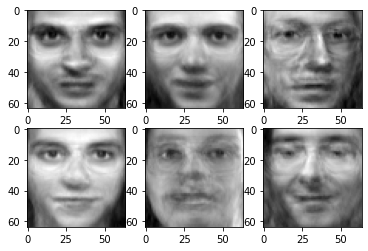

In [ ]:
images = np.asarray(damaged_faces, dtype=np.float32)

matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [ ]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=300)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


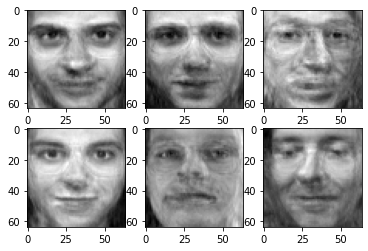

In [ ]:
images = np.asarray(damaged_faces, dtype=np.float32)

matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

# PCA 예제

## iris

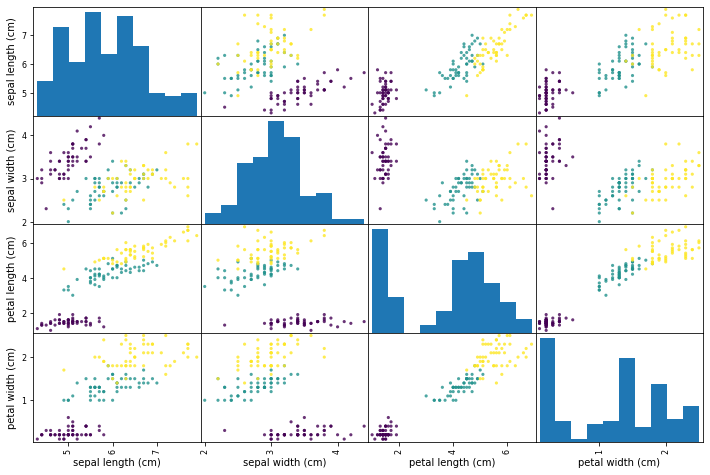

In [ ]:
import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

#loading dataset
iris = load_iris()
#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'],marker='o', s=10,alpha=.8, figsize=(12,8))
plt.show()

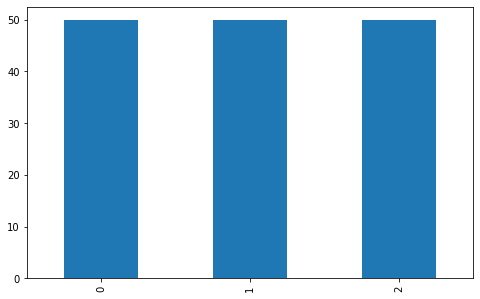

In [ ]:
#독립 변수와 종속 변수를 확인한다.
plt.figure(figsize=(8, 5))

X = iris.data
y = iris.target
feature_names = iris.feature_names

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

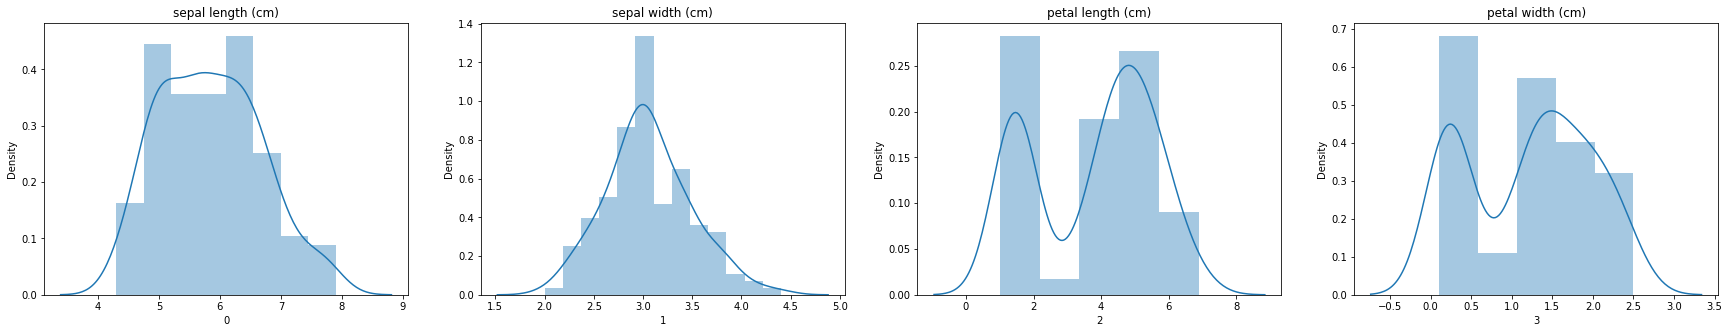

In [ ]:
import seaborn as sns
from matplotlib import rcParams

#fig = plt.figure(figsize=(30, 5))
fig, axes = plt.subplots(1, 4)
plt.gcf().set_size_inches(30, 5)

for i in range(df_X.shape[1]):
    sns.distplot(df_X[i], ax = axes[i])
    axes[i].set_title(feature_names[i])
    

In [ ]:
pca = PCA()
pca.fit(X)
PC_score = pca.transform(X)
PC_score[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [ ]:
#pca를 통해 얻은 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [ ]:
#explained_variacne를 통해서 PC값 들의 설명 정도를 확인
#PC값이 클수록 설명력이 높음
print(pca.explained_variance_)

#비율
ratio = pca.explained_variance_ratio_
print(ratio)

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.05306648 0.01710261 0.00521218]


,V_ration
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


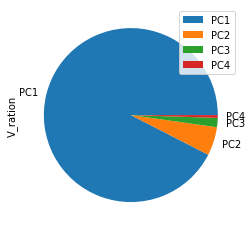

In [ ]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

Text(0.5, 1.0, 'PCA of IRIS dataset')

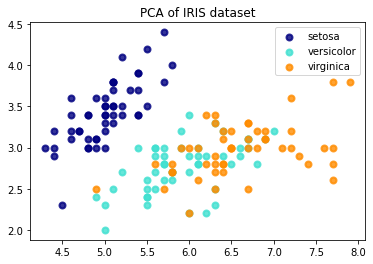

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Text(0.5, 1.0, 'PCA of IRIS dataset')

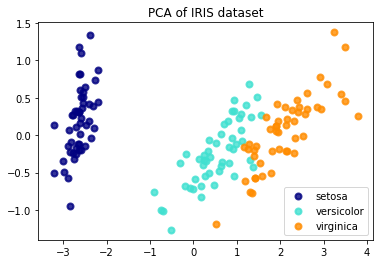

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1,2] , iris.target_names):
    plt.scatter(PC_score[y == i, 0], PC_score[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')